# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


## Clone project repository and install dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd {HOME}/yolov5

/content/yolov5


In [ ]:
%pip install -r requirements.txt

In [ ]:
import torch
import utils

In [ ]:
display = utils.notebook_init()

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.5/78.2 GB disk)


## Download pretrained weights

In [ ]:
from utils.downloads import attempt_download

In [ ]:
p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

## Inferring using segment/predict.py

In [ ]:
%cd {HOME}/yolov5

/content/yolov5


In [ ]:
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference

segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 54.0ms
Speed: 0.5ms pre-process, 54.0ms inference, 482.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference2


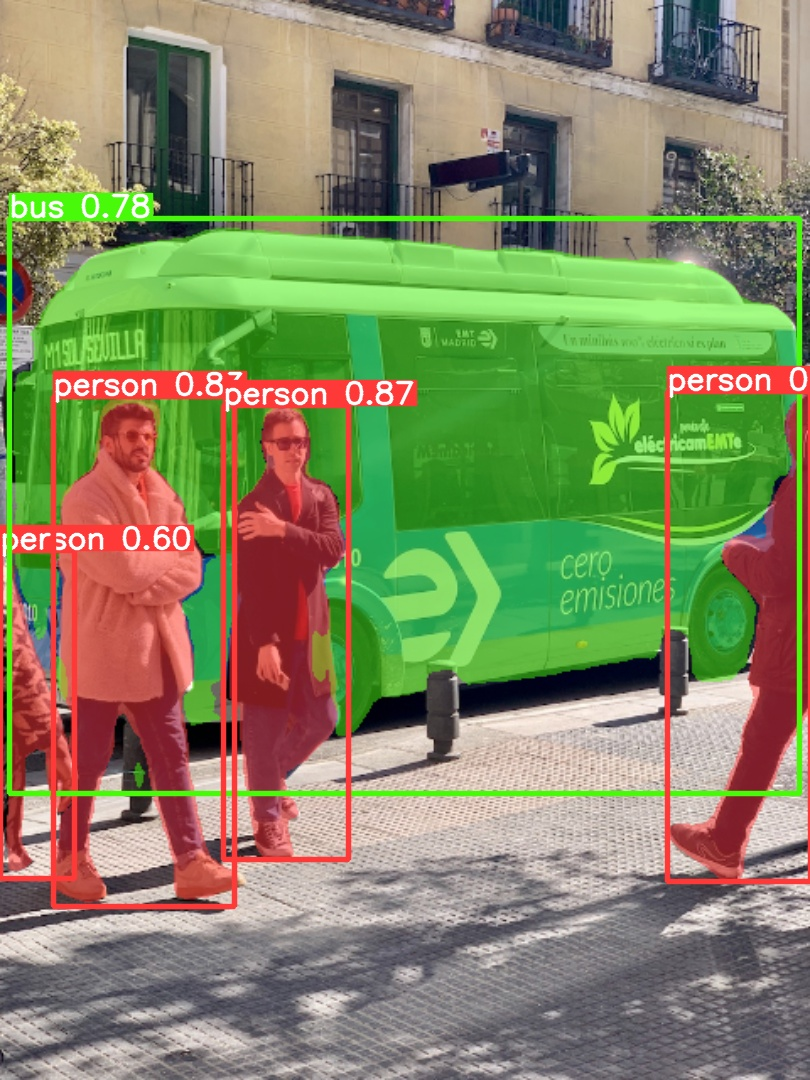

In [ ]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference2/bus.jpg", width=600)

# 2. Infer on COCO image

## Download example image

In [ ]:
#Download example image
import requests

In [ ]:
image_url = "https://i.imgur.com/EbOBS5l.jpg"

In [ ]:
response = requests.get(image_url)

In [ ]:
response.raise_for_status()

HTTPError: 429 Client Error: Unknown Error for url: https://i.imgur.com/EbOBS5l.jpg

In [ ]:
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

## Infer using segment/predict.py

In [ ]:
print(HOME)

/content


In [ ]:
%cd {HOME}/yolov5

/content/yolov5


In [ ]:
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco

segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 63.1ms
Speed: 0.5ms pre-process, 63.1ms inference, 549.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco2


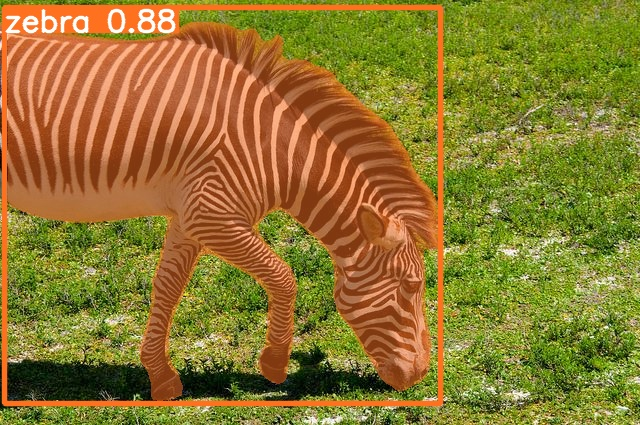

In [ ]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco2/zebra.jpg", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
!git version

git version 2.34.1


In [ ]:
import requests

torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 148MB/s]


replace /content/yolov5/datasets/coco128-seg/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/yolov5/datasets/coco128-seg/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:17<00:00,  4.32s/it]
                   all        128        929      0.693       0.65      0.712      0.488      0.675      0.626      0

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OjDu3gS8sU7AuPxBMCX4")
project = rf.workspace("school-sps5k").project("chorddetection")
version = project.version(11)
dataset = version.download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ChordDetection-11 in yolov5pytorch:: 100%|██████████| 3848/3848 [00:00<00:00, 5221.86it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- A
- Am
- B7
- Bm
- C
- D
- D7
- Dm
- Em
- F
- G
nc: 11
roboflow:
  license: CC BY 4.0
  project: chorddetection
  url: https://universe.roboflow.com/school-sps5k/chorddetection/dataset/11
  version: 11
  workspace: school-sps5k
test: ../test/images
train: ChordDetection-11/train/images
val: ChordDetection-11/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset

/content/yolov5
2024-04-01 03:29:26.035891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 03:29:26.035935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 03:29:26.037235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ChordDetection-11/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cl

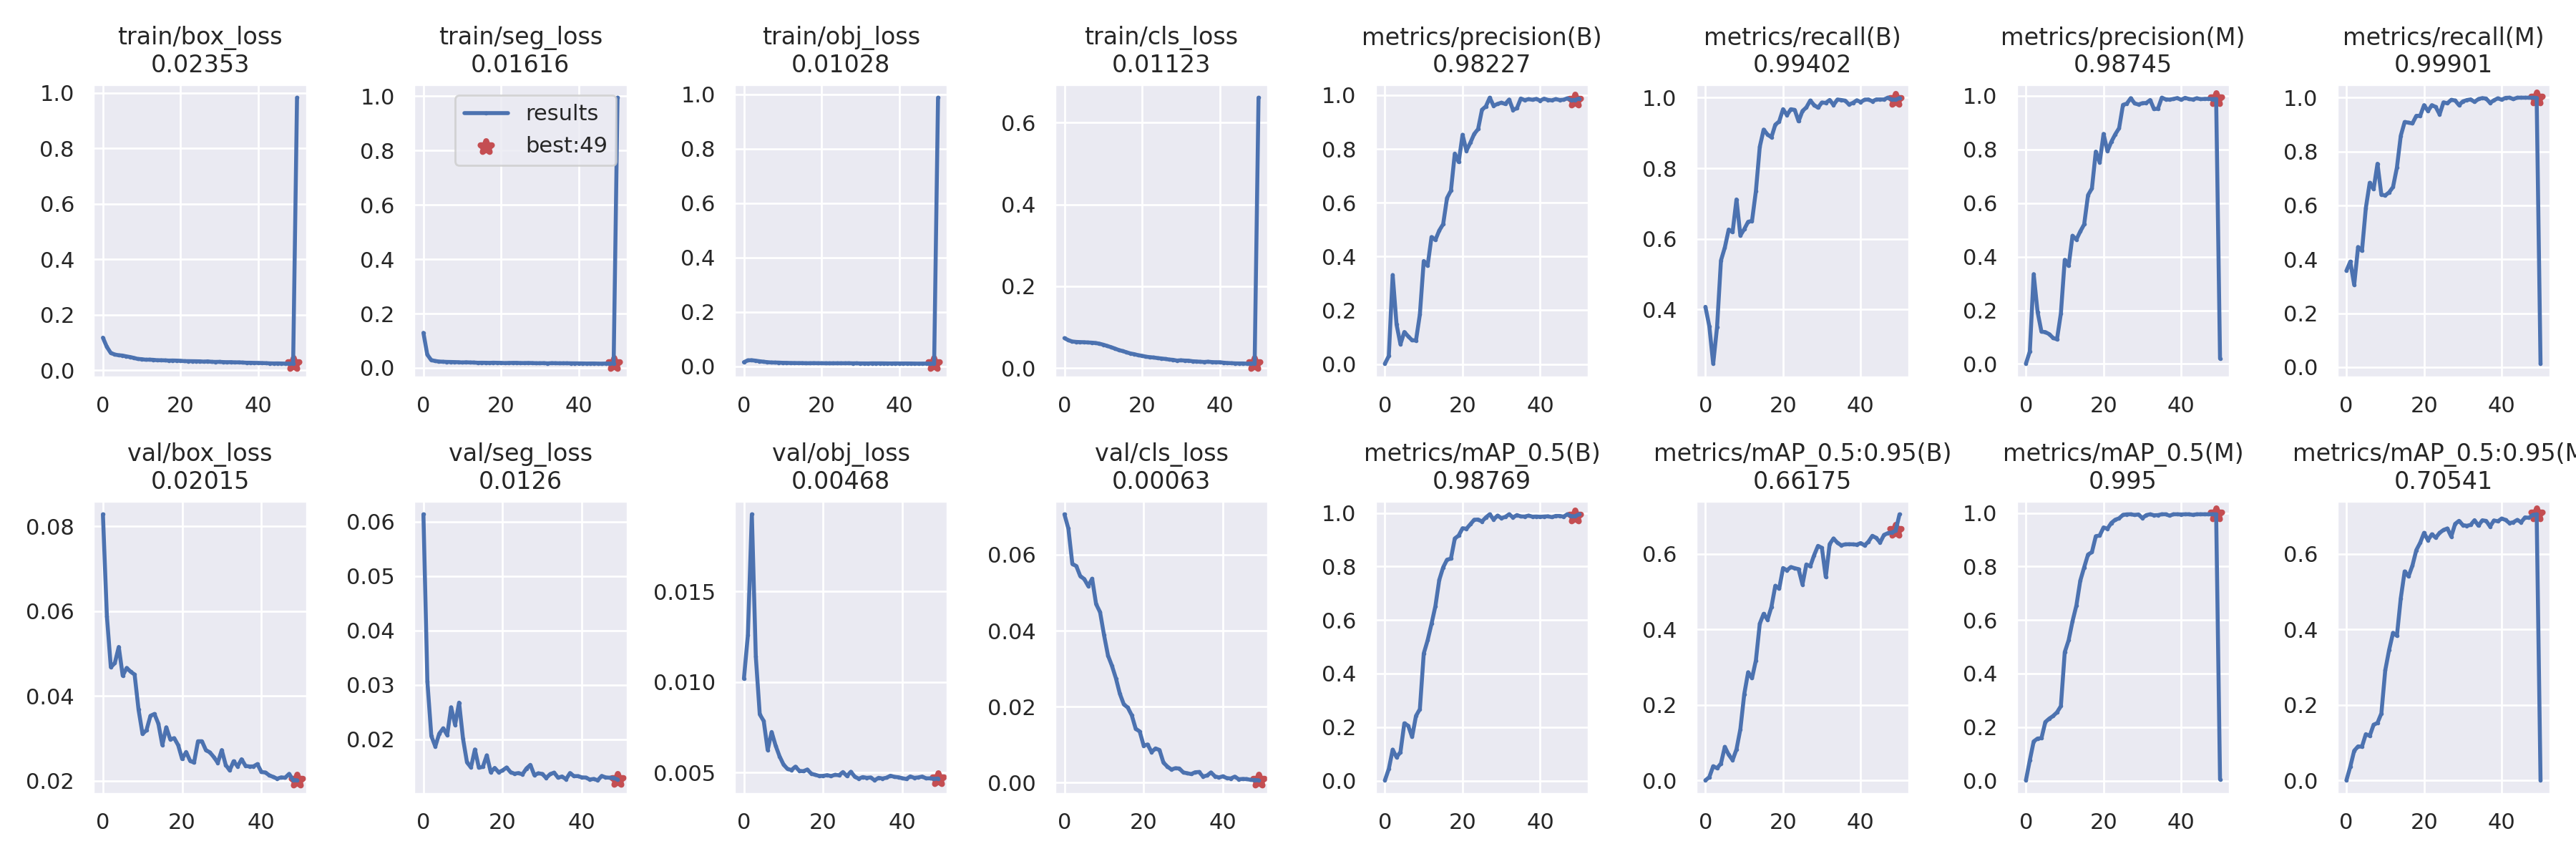

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset2/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/ChordDetection-11/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7425392 parameters, 0 gradients, 25.8 GFLOPs
val: Scanning /content/yolov5/ChordDetection-11/valid/labels.cache... 192 images, 0 backgrounds, 0 corrupt: 100% 192/192 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.03s/it]
                   all        192        192      0.982    

### Infer With Your Custom Model

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")

example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

In [ ]:
print(example_image_path)

/content/yolov5/ChordDetection-11/test/images/D_g1213_jpg.rf.b012b46e4dec1747dae0b84a2703974d.jpg


/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/ChordDetection-11/test/images/D_g1213_jpg.rf.b012b46e4dec1747dae0b84a2703974d.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7425392 parameters, 0 gradients, 25.8 GFLOPs
image 1/1 /content/yolov5/ChordDetection-11/test/images/D_g1213_jpg.rf.b012b46e4dec1747dae0b84a2703974d.jpg: 320x320 1 D, 1 G, 6.4ms
Speed: 0.3ms pre-process, 6.4ms inference

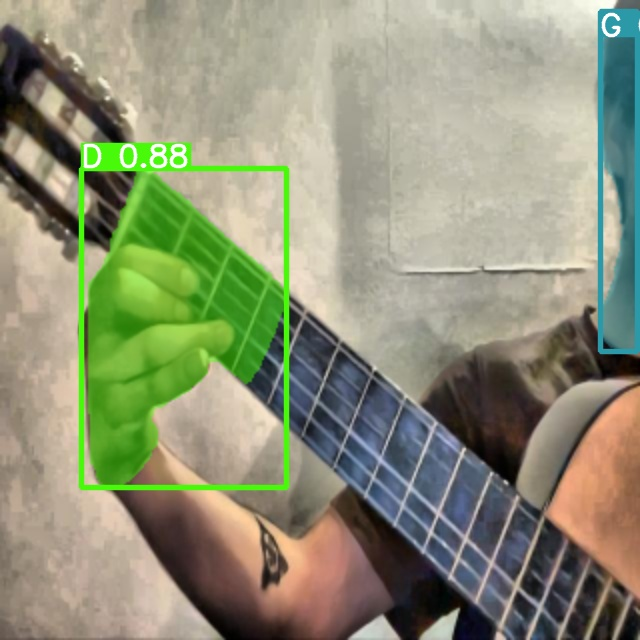

In [ ]:
%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
example_image_dir = "../example_images"

os.makedirs(example_image_dir, exist_ok=True)

In [ ]:
img_url_1 = 'https://static5.depositphotos.com/1003004/534/i/450/depositphotos_5345984-stock-photo-g-major-guitar-chord.jpg'

In [ ]:
response = requests.get(img_url_1)
response.raise_for_status()

with open(os.path.join(example_image_dir,f'example_1.jpg'), 'wb') as handler:
  handler.write(response.content)

In [ ]:
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7425392 parameters, 0 gradients, 25.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/example_images/example_1.jpg: 288x320 1 Am, 54.4ms
Speed: 0.3ms pre-process, 54.4ms inference, 626.2ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp13
1 labels saved to runs/predict-seg/exp13/labels


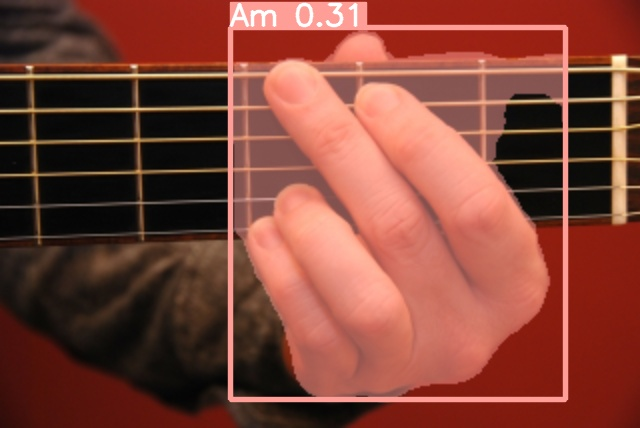

In [ ]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp5/example_1.jpg", width=600)

In [ ]:
img_url_1 = 'https://jtgt-static.b-cdn.net/system/dragonfly/production/2017/08/31/zm28xq8h5_Amin.jpg'

response = requests.get(img_url_1)
response.raise_for_status()

with open(os.path.join(example_image_dir,f'example_1.jpg'), 'wb') as handler:
  handler.write(response.content)

!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7425392 parameters, 0 gradients, 25.8 GFLOPs
image 1/2 /content/example_images/example_1.jpg: 320x320 (no detections), 6.4ms
image 2/2 /content/example_images/example_2.jpg: 320x320 (no detections), 6.8ms
Speed: 0.3ms pre-process, 6.6ms inference, 34.1ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp16
0 labels 

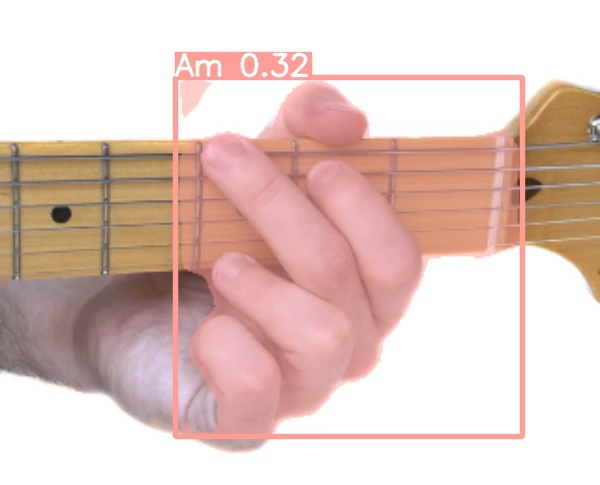

In [ ]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp15/example_1.jpg", width=600)

In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images2"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://chordbank.com/media2/chords_am_step3_master.jpg",
    "https://www.uberchord.com/wp-content/uploads/2016/07/AdobeStock_98164033.jpeg",
    "https://i0.wp.com/breakthroughguitar.com/wp-content/uploads/2023/05/How-to-play-a-D-chord-1-2.png?ssl=1"
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images2, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7425392 parameters, 0 gradients, 25.8 GFLOPs
image 1/3 /content/example_images2/example_0.jpg: 192x320 1 Dm, 53.6ms
image 2/3 /content/example_images2/example_1.jpg: 224x320 1 G, 57.4ms
image 3/3 /content/example_images2/example_2.jpg: 192x320 1 D7, 7.7ms
Speed: 0.3ms pre-process, 39.5ms inference, 163.6ms NMS per image at shape (1, 3, 320, 

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp18/labels")):
  with open(os.path.join("runs/predict-seg/exp18/labels",txt_file), 'r') as fid:
    for line in fid:
      label, *x, conf = line.strip().split(" ")
      conf = float(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break

Image has a low confidence prediction, uploading to project: example_0.jpg
Image has a low confidence prediction, uploading to project: example_1.jpg
Image has a low confidence prediction, uploading to project: example_2.jpg


In [ ]:
for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp18/labels")):
  display.Image(filename=f"/content/yolov5/runs/predict-seg/exp18/example_{i}.jpg", width=600)

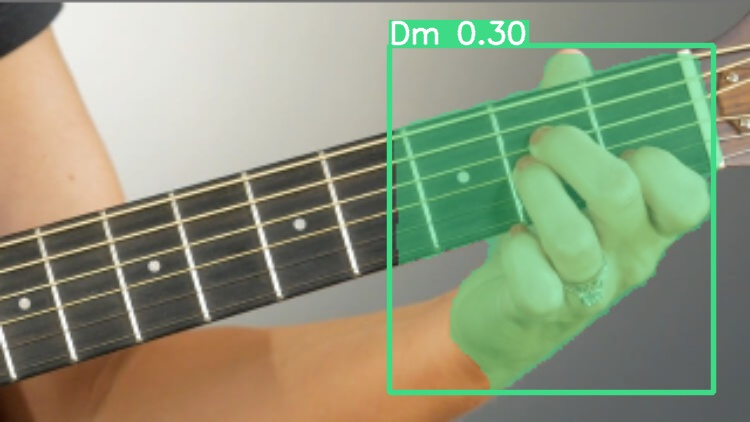

In [ ]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp18/example_0.jpg", width=600)

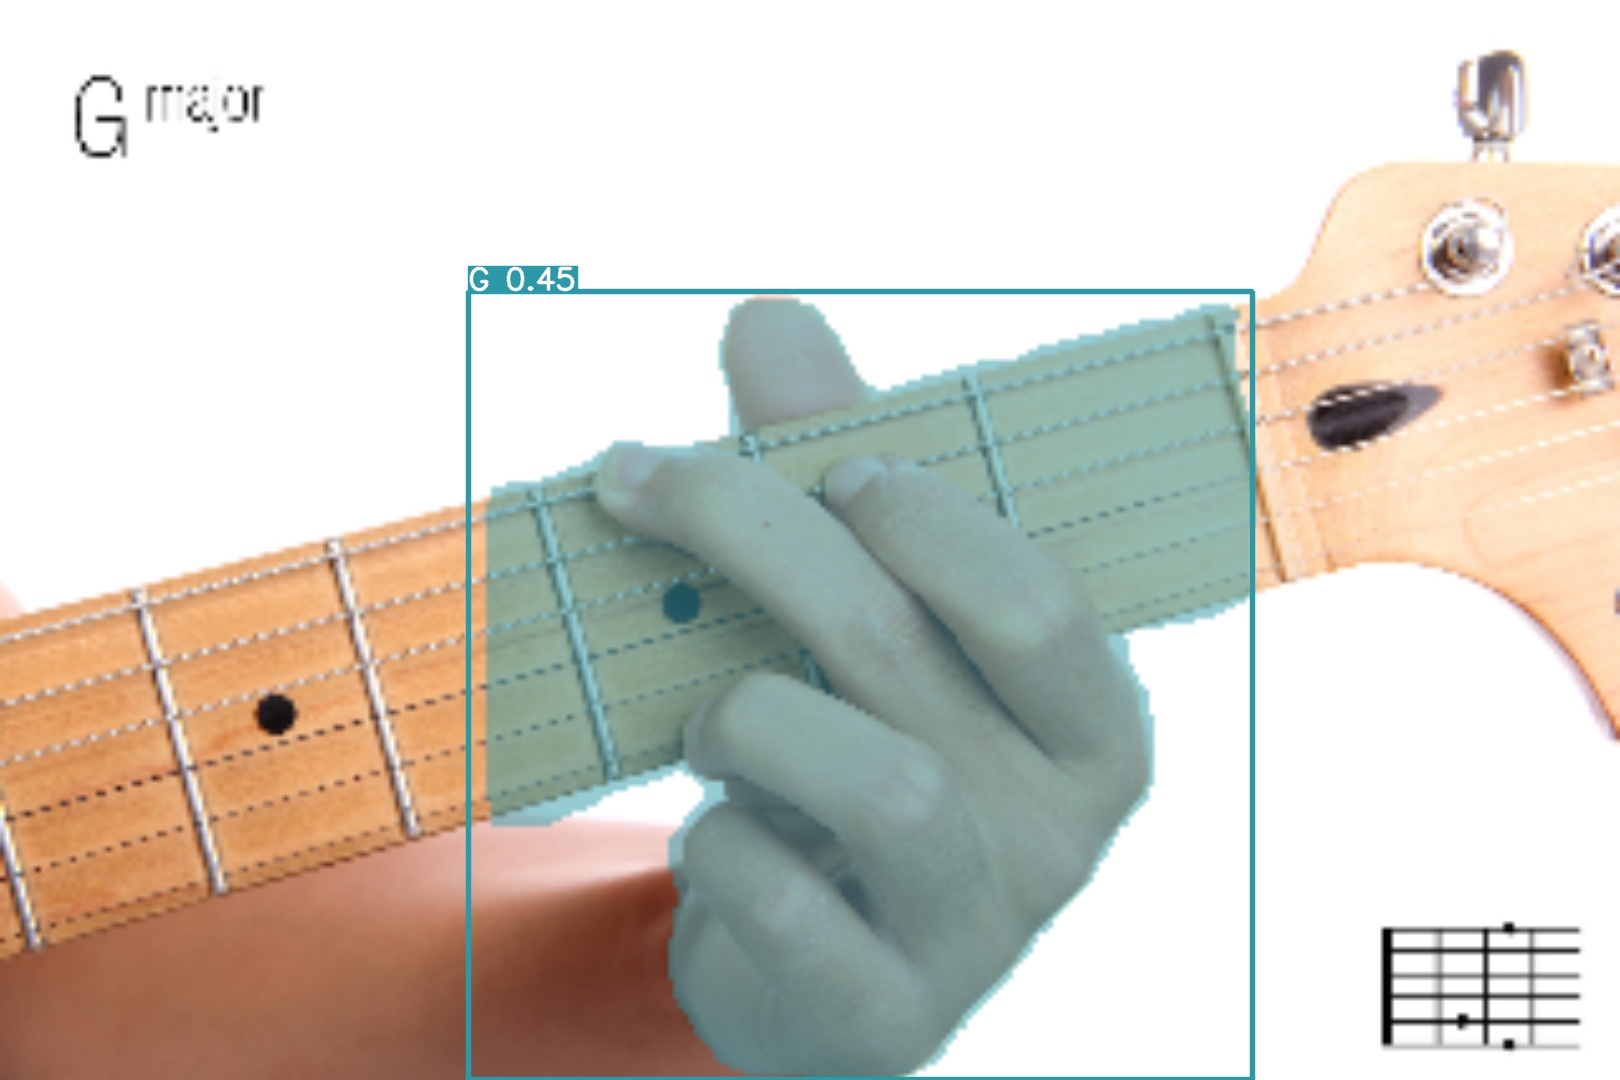

In [ ]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp18/example_1.jpg", width=600)

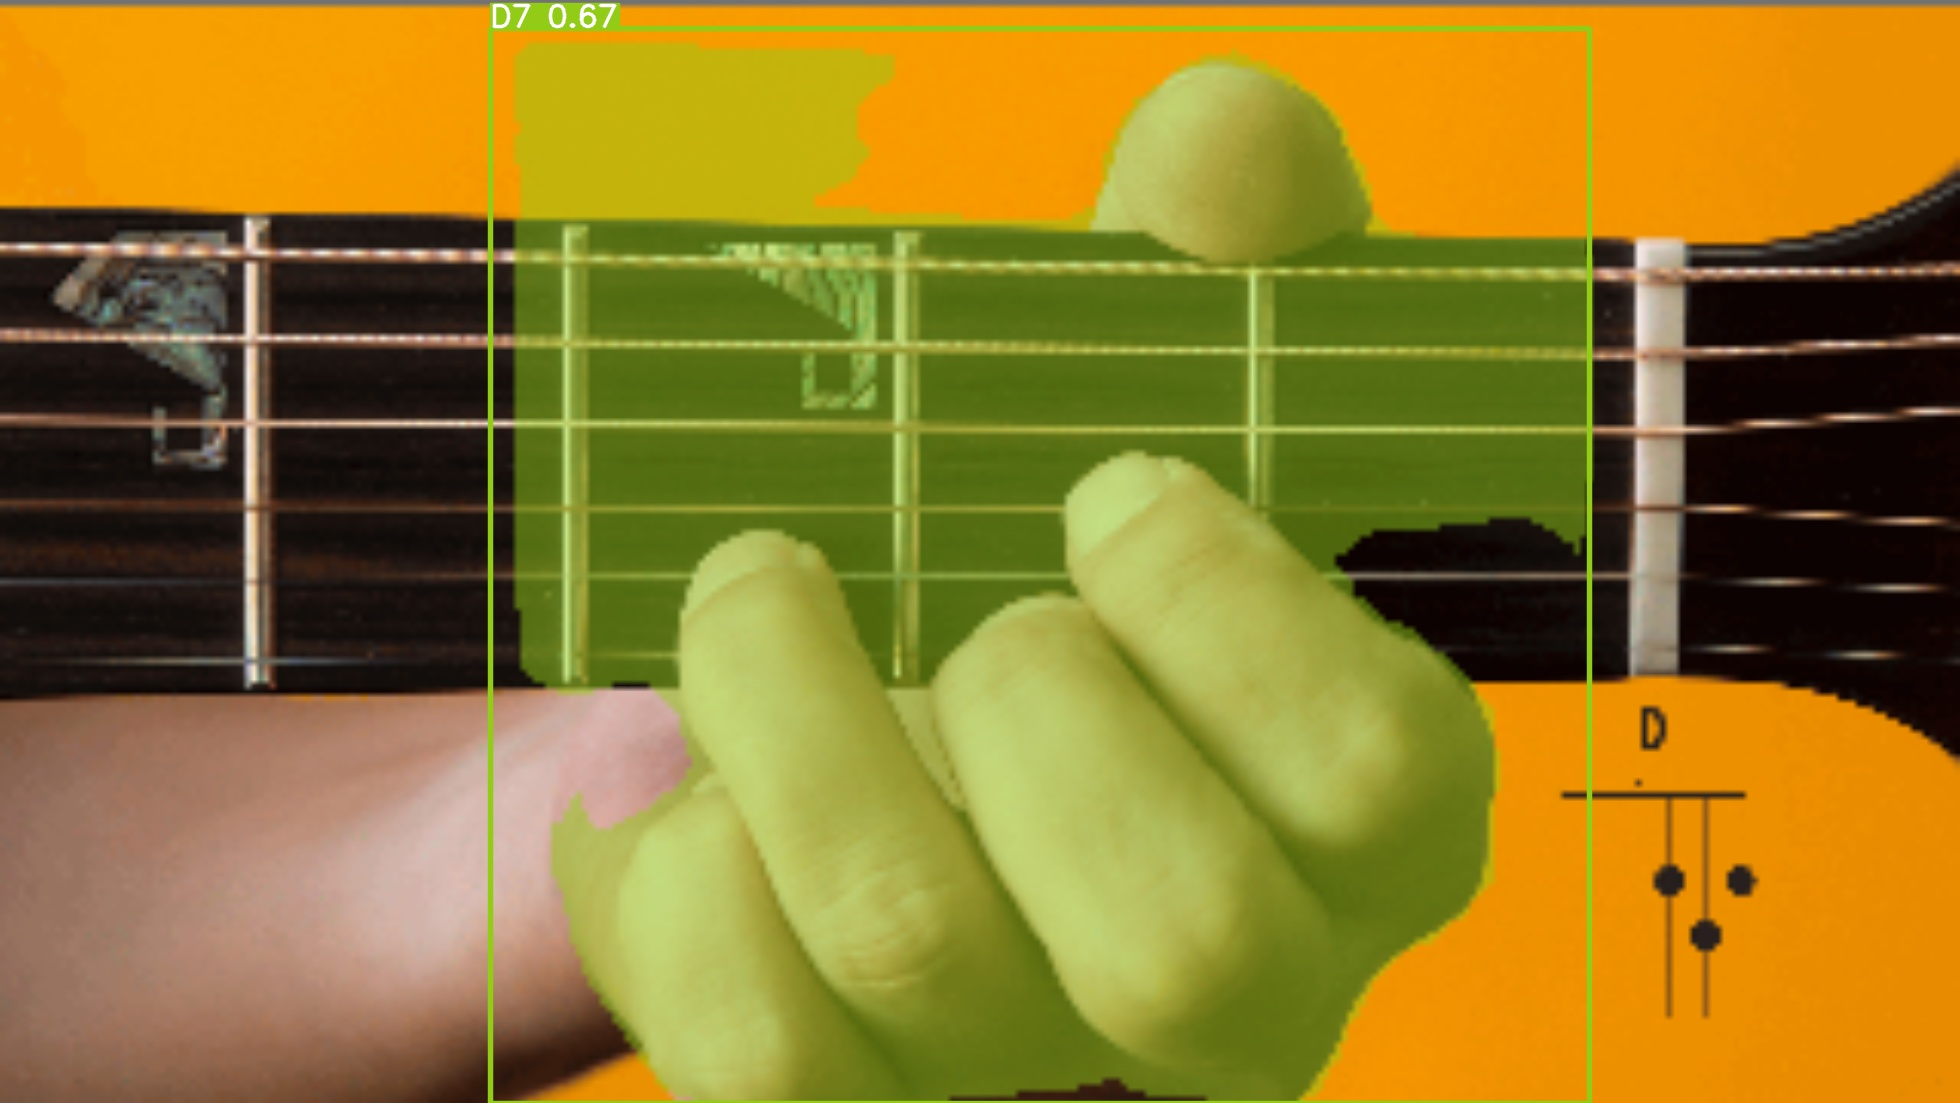

In [ ]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp18/example_2.jpg", width=600)

# Conclusion

> <p align = 'justify'> Instance segmentation refers to the segmentation or partitioning the an instance or class to the background. It differs from the semantic segmentation as instance segmentation focuses on the class itself while semantic segmentation partitions the image with all the possible class available.

> <p align = 'justify'> There's an issue using pulling a request on zebra image from imgur denoting an HTTPError of 429 or too many requests. I only trained the zebra by saving the image and uploading it in the local directory.

> <p align = 'justify'> In this activity, I've used the chord detection dataset from roboflow where it aims to segment the hand posture for every chord as well as the frets involved. Given the results, it works fine. With its average precision in less than 50% threshold, it shows good premise but from 50%-95% threshold wasn't that good given that the overall average precision is only around 70%.

